<a href="https://colab.research.google.com/github/Snake-AID/SnakeAid.AITraining/blob/main/SnakeAId_LabelVerify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import numpy as np

In [17]:

# --- Thay đường dẫn ảnh và file mask ---
img_path = "/content/ran_ho_mang_xiem_78_jpg.rf.a27e6baa5483e613774e15fba43403f7.jpg"
label_path = "/content/ran_ho_mang_xiem_78_jpg.rf.a27e6baa5483e613774e15fba43403f7.txt"


In [18]:
# Load ảnh
img = cv2.imread(img_path)
h, w = img.shape[:2]

In [19]:

# Load label
with open(label_path, "r") as f:
    data = f.read().strip().split()

# Bỏ class_id → lấy polygon points
coords = list(map(float, data[1:]))

In [20]:
# Chuyển normalized → pixel
pts = []
for i in range(0, len(coords), 2):
    x = int(coords[i] * w)
    y = int(coords[i+1] * h)
    pts.append([x, y])

pts = np.array(pts, np.int32)

array([[[ 88, 133, 146],
        [ 54,  97, 112],
        [ 20,  59,  81],
        ...,
        [  3,   4,   0],
        [  0,   5,   0],
        [  0,  10,   0]],

       [[ 64, 109, 122],
        [ 41,  84,  99],
        [ 64, 103, 125],
        ...,
        [  0,   2,   0],
        [  0,   6,   0],
        [  0,  16,   1]],

       [[ 43,  86, 101],
        [ 21,  64,  81],
        [ 98, 137, 159],
        ...,
        [  0,   2,   0],
        [  0,  15,   1],
        [  1,  35,  18]],

       ...,

       [[ 70, 114, 145],
        [ 58, 102, 133],
        [ 45,  89, 120],
        ...,
        [ 57,  98, 123],
        [ 82, 123, 146],
        [ 74, 115, 138]],

       [[ 48,  92, 123],
        [ 23,  67,  98],
        [  0,  44,  75],
        ...,
        [ 58,  98, 123],
        [ 70, 111, 134],
        [ 85, 124, 146]],

       [[ 18,  62,  93],
        [  0,  39,  70],
        [  0,  29,  60],
        ...,
        [ 75, 116, 139],
        [ 75, 113, 137],
        [110, 149, 171]]], dtype=uint8)
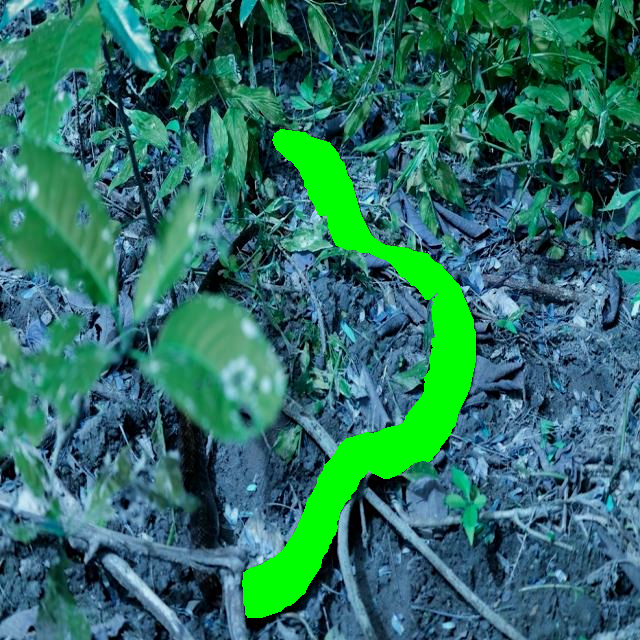

In [21]:
# Vẽ polygon mask (đường viền + tô mờ)
vis = img.copy()
cv2.polylines(vis, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.fillPoly(vis, [pts], color=(0, 255, 0,))

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

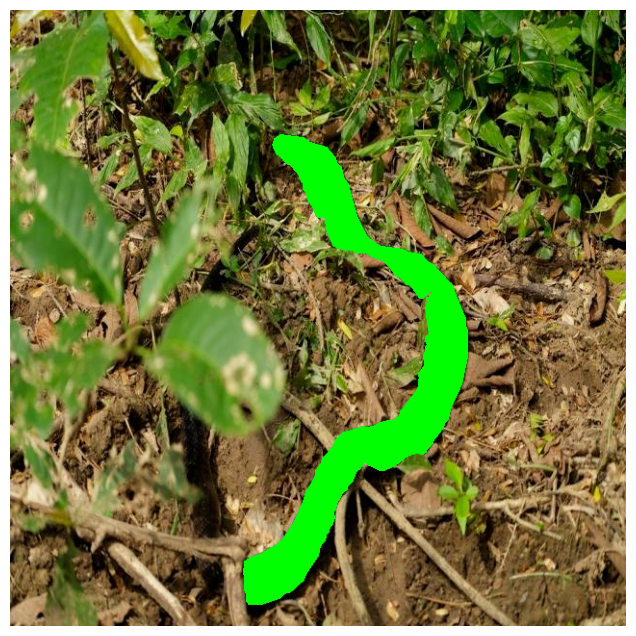

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
